<a href="https://colab.research.google.com/github/jxxngho/HG_MLDL/blob/main/03_1_K_Neighbor_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-최근접 이웃 회귀

In [37]:
# 지도 학습 알고리즘 -> 분류 or 회귀
# 분류 : 샘플을 몇 개의 클래스 중 하나로 분류하는 문제
# 회귀 : 임의의 어떤 숫자를 예측하는 문제
# ex) 내년도 경제 성장률을 예측하거나 배달이 도착할 시간을 예측하는 것

# 데이터 준비

In [38]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

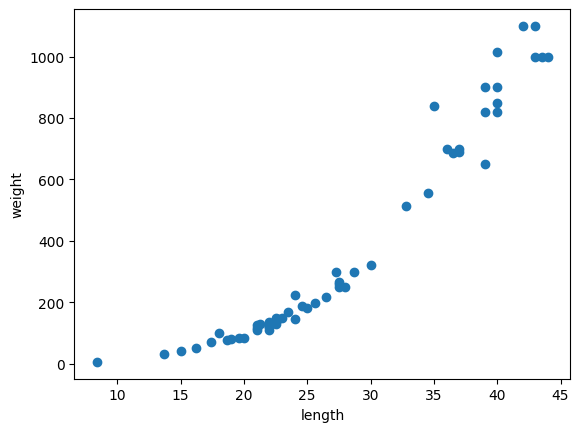

In [39]:
import matplotlib.pyplot as plt

plt.scatter(perch_length,perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [40]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length,perch_weight, random_state=42)

# 사이킷런에 사용할 훈련 세트는 2차원 배열이어야함-> reshape 필요

In [41]:
# 크기에 -1을 지정하면 나머지 원소 개수로 모두 채워넣으라는 뜻
# 예를 들어 첫 번째 크기를 나머지 원소로 채우고, 두번째 크기를 1로 하려면 (-1,1)처럼 사용

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


# 결정 계수(R<sup>2</sup>)


In [42]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# k-최근접 이웃 회귀 모델을 훈련
knr.fit(train_input, train_target)
knr.score(test_input,test_target)

# 분류의 경우 정확도 -> 테스트 세트에 있는 샘플을 정확하게 분류한 개수의 비율
# 회귀의 경우 결정계수, 1-(타깃-예측)^2의 합/(타깃-평균)^2의 합
# 만약 타깃의 평균 정도를 예측하는 수준이라면(즉 분자와 분모가 비슷) 0에 가까워지고
# 예측이 타깃이 아주 가까워지면 분자가 0에 가까워지기 때문에 1에 가까워짐

0.992809406101064

In [43]:
# 타깃과 예측한 값 사이의 차이를 구하기

from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

# 결과에서 평균적으로 19g정도 타깃값과 다른 것을 확인할 수 있음

19.157142857142862


In [44]:
# score메서드에 훈련 세트 전달

print(knr.score(train_input, train_target))

# 훈련 세트에서 점수가 굉장히 좋았는데 테스트 세트에서는 점수가 굉장히 나쁘면 모델이 훈련 세트에 "과대적합"되었다.
# 훈련 세트에만 잘 맞는 모델이라 테스트 세트와 새로운 샘플에 대한 예측을 만들 때는 잘 작동하지 않는 것

# 반대로 훈련세트보다 테스트 세트의 점수가 높거나, 두 점수가 모두 너무 낮는 경우는 "과소적합"되었다.
# 모델이 너무 단순하여 훈련 세트에 적절히 훈련되지 않은 경우

0.9698823289099254


In [45]:
# 위 경우는 과소적합 ! -> 모델을 더 복잡하게 만들자!
# k-최근접 이웃 알고리즘으로 모델을 더 복잡하게 만드는 것은 k개수를 줄이는 것

knr.n_neighbors = 3
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input,test_target))

0.9804899950518966
0.9746459963987609


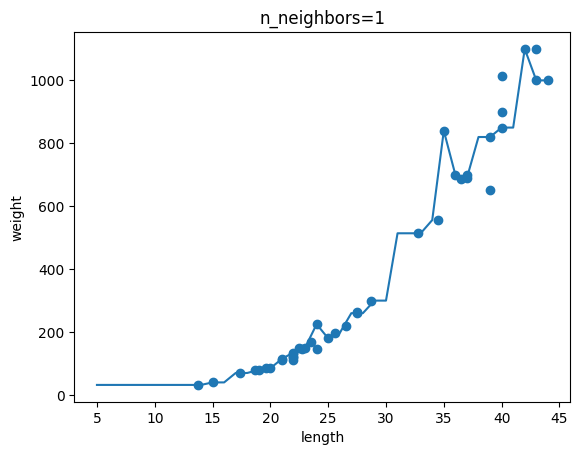

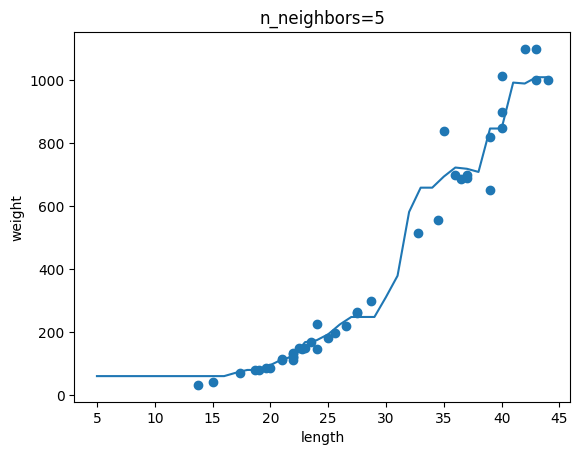

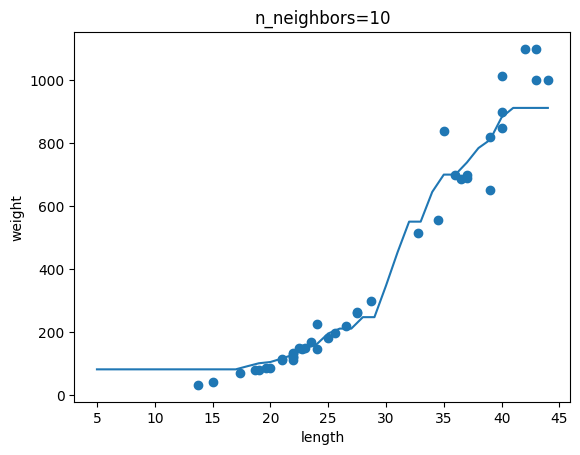

In [47]:
# 확인문제2

knr2 = KNeighborsRegressor()

# x좌표 5~45
x = np.arange(5,45).reshape(-1,1)

for n in [1,5,10]:
  knr2.n_neighbors = n
  knr2.fit(train_input,train_target)

  prediction = knr2.predict(x)
  plt.scatter(train_input, train_target)
  plt.plot(x,prediction)
  plt.title('n_neighbors={}'.format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()